In [162]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data_prefix = 'D:/USA 2020 Spring/data mining/Python Lab'

In [164]:
pd.set_option('display.max_columns', None)
traindf = pd.read_csv(os.path.join(data_prefix, 'PYTHON_LAB_TRAIN.csv'))
testdf = pd.read_csv( os.path.join(data_prefix, 'PYTHON_LAB_DF_TEST_2.csv'))

In [165]:
traindf.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYT

In [166]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 292 entries, SCHED_SURG_AREA to LOS
dtypes: float64(279), int64(1), object(12)
memory usage: 178.2+ MB


In [167]:
pd.set_option('display.max_rows', 292)
traindf.isnull().sum()

SCHED_SURG_AREA                         0
RACE                                10503
ETHNIC_GROUP                        11864
PROC_DATE                               0
SCHED_HOSPITAL                          0
CREATE_DT_TM                            0
SCHED_START_DT_TM                       0
SCHED_SURG_PROC_CD                      0
FEMALE                              10187
AGE_ON_CONTACT_DATE                 10187
BMI                                 19259
WEIGHT                              18970
BP_SYSTOLIC                         21147
BP_DIASTOLIC                        21203
PULSE                               34728
PCPVISIT                            10187
METFORMIN_FLAG                      10187
OPIOIDS_FLAG                        10187
ALPHA_BLOCKERS                      10187
CENTRAL_ANTAGONISTS                 10187
RENIN                               10187
BETA_BLOCKERS                       10187
ACE_INHIB                           10187
ARB                               

In [168]:
#Drop someone don't go to office
traindf.dropna(subset = ["FEMALE"], inplace=True)

In [169]:
#Drop column that have over 95% Nan values
for col in traindf:
    if sum(pd.isnull(traindf[col]))>len(traindf) * 0.95:
        traindf.drop([col],axis=1,inplace=True)
print('\nTrain shape: {}'.format(traindf.shape)) 


Train shape: (69813, 240)


In [170]:
#Drop repeat features
traindf = traindf.drop(["CAV_REC_SEX","CAV_REC_LANG","CAV_REC_AGE"], axis=1)

In [171]:
#Fill nan values by mode or mean
for col in traindf:
    if traindf[col].dtype == "object":
        traindf[col].fillna(traindf[col].mode()[0], inplace=True)
    else:
        traindf[col].fillna(traindf[col].mean(), inplace=True)

In [172]:
#Transformed the length of stay post-surgery into Long stay or Short stay
traindf["risk"] = traindf.LOS.apply(lambda x : 1 if x >5  
                                         else (0))

In [173]:
# age to young, mid_age, old, older
def age_simple(age):
    if age<=44:
        return "young"
    elif age>44 and age<=59:
        return "mid_age"
    elif age>59 and age<=74:
        return "old"
    elif age>74:
        return "older"

In [174]:
traindf["age_people"] = traindf["AGE_ON_CONTACT_DATE"].apply(age_simple)

In [175]:
pd.set_option('display.max_rows', 240)
traindf.isnull().sum()

SCHED_SURG_AREA                     0
RACE                                0
ETHNIC_GROUP                        0
PROC_DATE                           0
SCHED_HOSPITAL                      0
CREATE_DT_TM                        0
SCHED_START_DT_TM                   0
SCHED_SURG_PROC_CD                  0
FEMALE                              0
AGE_ON_CONTACT_DATE                 0
BMI                                 0
WEIGHT                              0
BP_SYSTOLIC                         0
BP_DIASTOLIC                        0
PULSE                               0
PCPVISIT                            0
METFORMIN_FLAG                      0
OPIOIDS_FLAG                        0
ALPHA_BLOCKERS                      0
CENTRAL_ANTAGONISTS                 0
RENIN                               0
BETA_BLOCKERS                       0
ACE_INHIB                           0
ARB                                 0
ALDOSTERONE_BLOCKERS                0
VASODIALATORS                       0
DIURETICS   

In [176]:
traindf.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,ADI_2015,LOS,risk,age_people
0,ALTOR,White,Not Hispanic or Latino,2/19/2018 0:00,ALT,2/13/2018 20:04,2/19/2018 7:00,3904785,0.0,73.3,28.21,3056.0,102.000000,70.000000,83.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [177]:
traindf.describe()

,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,ADI_2015,LOS,risk
count,6.981300e+04,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000

In [178]:
traindf.columns

Index(['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'PROC_DATE',
       'SCHED_HOSPITAL', 'CREATE_DT_TM', 'SCHED_START_DT_TM',
       'SCHED_SURG_PROC_CD', 'FEMALE', 'AGE_ON_CONTACT_DATE',
       ...
       'ALT_MAX_1', 'ALT_MIN_1', 'ALKALINE_PHOSPHATASE_MAX_1',
       'ALKALINE_PHOSPHATASE_MIN_1', 'TOTAL_PROTEIN_MAX_1',
       'TOTAL_PROTEIN_MIN_1', 'ADI_2015', 'LOS', 'risk', 'age_people'],
      dtype='object', length=239)

In [179]:
traindf.SCHED_SURG_AREA.value_counts()

SHYOR     7628
PUHOR     7492
HAMOR     6905
PASOR     5179
MWHOR     4244
SMHOR     4160
ALTOR     4004
MHPOR     3822
MUHOR     3098
MWHOB     2724
HAMWM     2548
EASOR     1715
HAMGI     1490
PUHGI     1425
JAMOR     1377
PASGI     1359
SHNOR     1227
SHYGI     1209
NOROR      931
ALTGI      924
MHPGI      827
SMHGI      744
EASPR      738
MCKOR      637
BEDOR      540
CRNOR      526
MCKGI      388
MHPOB      283
ALTOB      275
SHYAS      251
MHPSD      193
NOROB      191
GRVOR      165
NORGI      134
SHNAMB     129
BEDGI       99
GRVAMB      73
PUHGK       40
CRNGI       39
SMHTX       30
ALTRAD      29
PUHMR       17
ALTSC        3
MSSC         1
Name: SCHED_SURG_AREA, dtype: int64

In [182]:
traindf.FEMALE.value_counts()

1.0    40629
0.0    29184
Name: FEMALE, dtype: int64

In [183]:
traindf.age_people.value_counts()

old        23880
young      15794
mid_age    15615
older      14524
Name: age_people, dtype: int64

In [194]:
pd.pivot_table(traindf, index='SCHED_SURG_AREA', values="risk").sort_values("risk",ascending=False)

,risk
SCHED_SURG_AREA,
PUHOR,0.398025
PUHGI,0.347368
ALTSC,0.333333
MHPOR,0.315542
SHYOR,0.284216
MUHOR,0.283731
MCKOR,0.266876
SHYGI,0.257237
MHPGI,0.234583


In [195]:
pd.pivot_table(traindf, index='age_people', values="risk").sort_values("risk",ascending=False)

,risk
age_people,
older,0.269898
old,0.235930
mid_age,0.201217
young,0.104850


In [201]:
pd.pivot_table(traindf, index='FEMALE', values="risk").sort_values("risk",ascending=False)

,risk
FEMALE,
0.0,0.248561
1.0,0.174703


In [193]:
pd.pivot_table(traindf, index=['SCHED_SURG_AREA','age_people'], values="risk").sort_values("risk",ascending=False)

risk
SCHED_SURG_AREA age_people          
ALTSC           old         0.500000
PUHOR           older       0.440031
                old         0.427780
PUHGI           old         0.393762
PUHOR           mid_age     0.383803
MCKOR           older       0.380952
MHPOR           older       0.373313
PUHGI           older       0.344000
PUHGK           young       0.333333
SHYOR           older       0.332989
MHPOR           old         0.331316
PUHGI           mid_age     0.326260
PUHOR           young       0.325941
MHPOR           mid_age     0.308293
MUHOR           older       0.301587
PUHGI           young       0.294737
MUHOR           old         0.291853
NORGI           old         0.291667
SHYGI           old         0.286611
MCKOR           old         0.283019
MUHOR           young       0.281567
EASOR           older       0.277273
PASOR           older       0.275503
SHYOR           old         0.275470
                mid_age     0.272371
MCKGI           older       0.269231
MUHOR           mid_age     0.268053
MHPGI           old         0.264493
SHYGI           older       0.258427
ALTOR           older       0.255102
MHPOR           young       0.251238
MHPGI           mid_age     0.247619
ALTGI           older       0.246334
SMHOR           older       0.244282
MHPGI           older       0.240664
HAMGI           older       0.228070
PASGI           old         0.225131
PASOR           old         0.223485
SHYGI           mid_age     0.221311
JAMOR           older       0.219807
HAMOR           older       0.217663
SHYOR           young       0.214176
SHYGI           young       0.213740
PASGI           older       0.213445
MCKOR           mid_age     0.211921
JAMOR           old         0.210216
MCKGI           mid_age     0.204545
SHYAS           older       0.200000
NORGI           mid_age     0.200000
PASOR           mid_age     0.196007
ALTGI           old         0.193750
SHNOR           older       0.192488
NOROR           older       0.187251
ALTOR           old         0.183056
NORGI           older       0.181818
EASPR           old         0.181818
MHPSD           mid_age     0.173913
NORGI           young       0.166667
PUHMR           old         0.166667
EASOR           old         0.163558
HAMGI           old         0.163306
MWHOR           older       0.162304
SMHOR           old         0.161899
SMHGI           older       0.161616
ALTOR           mid_age     0.159822
HAMOR           old         0.159596
PASGI           mid_age     0.158879
EASOR           mid_age     0.157068
SMHOR           mid_age     0.151913
NOROR           old         0.146789
EASPR           older       0.145985
SHYAS           young       0.145455
SMHGI           mid_age     0.144737
ALTGI           mid_age     0.144509
JAMOR           mid_age     0.144262
GRVAMB          older       0.138889
SHYAS           old         0.137500
MCKGI           old         0.133333
MCKOR           young       0.132075
HAMGI           young       0.128079
MWHOR           old         0.127915
MHPSD           young       0.126984
SHNOR           old         0.126404
EASPR           mid_age     0.125984
BEDGI           mid_age     0.125000
MHPSD           older       0.125000
HAMOR           mid_age     0.120738
SMHGI           old         0.120536
PASOR           young       0.118321
SHNAMB          old         0.116279
SMHTX           old         0.111111
MHPGI           young       0.110000
HAMGI           mid_age     0.107463
GRVAMB          old         0.100000
SMHOR           young       0.099010
SMHGI           young       0.098592
MWHOR           mid_age     0.097876
GRVOR           mid_age     0.093750
                old         0.092593
                older       0.090909
MHPSD           old         0.083333
EASOR           young       0.081633
SHNOR           mid_age     0.081197
JAMOR           young       0.080537
MCKGI           young       0.080000
BEDOR           older       0.078125
SHYAS           mid_age     0.076923

In [202]:
pd.pivot_table(traindf, index=['SCHED_SURG_AREA','FEMALE'], values="risk").sort_values("risk",ascending=False)

risk
SCHED_SURG_AREA FEMALE          
PUHOR           0.0     0.416970
                1.0     0.378082
PUHGI           0.0     0.372155
ALTSC           1.0     0.333333
MUHOR           0.0     0.327526
PUHGI           1.0     0.320059
MHPOR           0.0     0.316398
                1.0     0.314613
SHYOR           0.0     0.290339
MCKOR           1.0     0.288410
NORGI           1.0     0.283784
SHYOR           1.0     0.277409
SHYGI           0.0     0.261905
                1.0     0.252818
MUHOR           1.0     0.245941
SHYAS           0.0     0.241379
MHPGI           0.0     0.237624
PASOR           0.0     0.237162
MCKOR           0.0     0.236842
MHPGI           1.0     0.231678
MCKGI           0.0     0.221557
PASGI           0.0     0.220949
ALTGI           0.0     0.210145
PASOR           1.0     0.206240
JAMOR           0.0     0.204819
ALTOR           0.0     0.203190
EASOR           0.0     0.190094
SMHOR           0.0     0.183307
EASPR           0.0     0.183140
HAMGI           0.0     0.178273
EASOR           1.0     0.175620
ALTGI           1.0     0.172549
JAMOR           1.0     0.169598
SMHOR           1.0     0.168505
MCKGI           1.0     0.162896
PASGI           1.0     0.159091
HAMGI           1.0     0.154145
ALTOR           1.0     0.150151
NORGI           0.0     0.150000
HAMOR           0.0     0.149337
MHPSD           1.0     0.141414
SMHGI           0.0     0.140351
                1.0     0.139303
ALTRAD          1.0     0.125000
HAMOR           1.0     0.121652
NOROR           0.0     0.121281
GRVAMB          1.0     0.119048
EASPR           1.0     0.116751
NOROR           1.0     0.115385
SHNOR           0.0     0.113065
PUHGK           1.0     0.111111
MHPSD           0.0     0.106383
MWHOR           1.0     0.102234
                0.0     0.097074
GRVAMB          0.0     0.096774
GRVOR           1.0     0.092593
SMHTX           0.0     0.090909
SHYAS           1.0     0.088083
SHNOR           1.0     0.084439
PUHMR           0.0     0.083333
SHNAMB          0.0     0.083333
BEDGI           0.0     0.063830
SHNAMB          1.0     0.061728
BEDGI           1.0     0.057692
SMHTX           1.0     0.052632
GRVOR           0.0     0.052632
BEDOR           0.0     0.049808
                1.0     0.035842
CRNGI           1.0     0.035714
MWHOB           1.0     0.030837
HAMWM           0.0     0.027027
                1.0     0.008084
MHPOB           1.0     0.007067
CRNOR           1.0     0.004184
ALTOB           1.0     0.003636
MSSC            1.0     0.000000
ALTRAD          0.0     0.000000
CRNGI           0.0     0.000000
PUHMR           1.0     0.000000
CRNOR           0.0     0.000000
PUHGK           0.0     0.000000
NOROB           1.0     0.000000

In [203]:
pd.pivot_table(traindf, index=['FEMALE','age_people'], values="risk").sort_values("risk",ascending=False)

risk
FEMALE age_people          
0.0    older       0.279884
1.0    older       0.261656
0.0    old         0.253217
       mid_age     0.243605
1.0    old         0.219231
0.0    young       0.193043
1.0    mid_age     0.168501
       young       0.074112

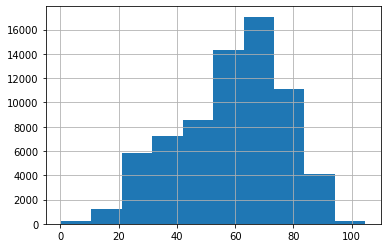

In [127]:
traindf.AGE_ON_CONTACT_DATE.hist()

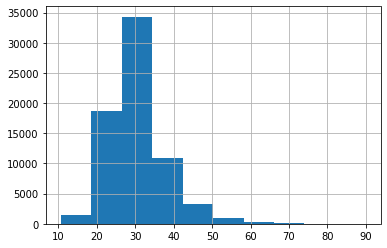

In [128]:
traindf.BMI.hist()

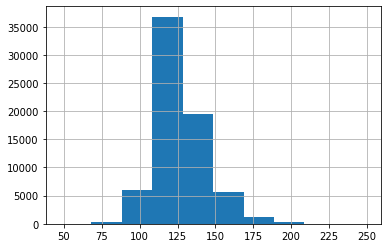

In [129]:
traindf.BP_SYSTOLIC.hist()

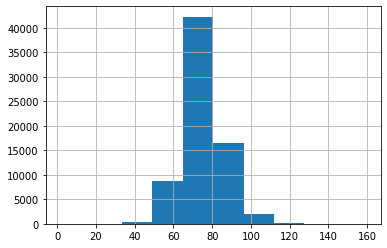

In [130]:
traindf.BP_DIASTOLIC.hist()

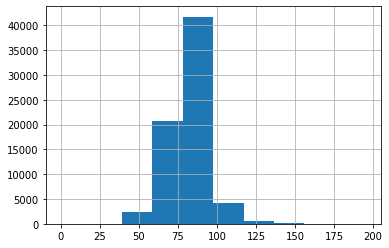

In [131]:
traindf.PULSE.hist()

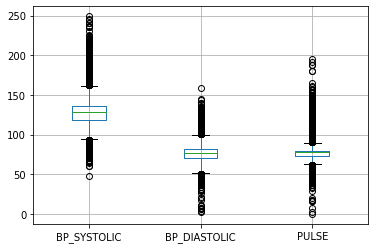

In [132]:
traindf.boxplot(column=["BP_SYSTOLIC","BP_DIASTOLIC","PULSE"])